<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Thierry Parmentelat &amp; Arnaud Legout</span>
</div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

# l'ensemble de Mandelbrot

il s'agit de calculer l'image de la convergence de mandelbrot:

<img src="media/mandelbrot.svg">

## comment ça marche ?

* dans l'espace complexe, on définit pour chaque $c\in\mathbb{C}$ la suite
   * $z_0 = c$
   * $z_{n+1} = z_n^2 + c$
* on démontre que 
  * lorsque $|z_n|>2$, la suite diverge

il s'agit pour nous de 

* partir d'un pavé rectangulaire  
  par exemple sur la figure, on a pris l'habituel  
  $re \in [-2, 0.8]$ et  $im \in [-1.4, 1.4]$
* découper ce pavé en un maillage de $w \times h$ points  
  (sur la figure, 1000 x 1000)
* on se fixe un nombre maximal `max` d'itérations (disons 20)
  * et pour chaque point du maillage, on va calculer si la suite diverge avant `max` itérations
* c'est-à-dire plus spécifiquement on calcule un tableau `diverge` de la taille du maillage
  * pour chaque point `z`, on calcule les `max` premiers termes de la suite
  * et à la première itération `n` où la suite diverge (son module est supérieur à 2)  
    alors on affecte `diverge[z] = n`
* on n'a plus qu'à afficher ensuite l'image obtenue avec `plt.imshow`

*indices*

* pour fabriquer la grille des points de départ, 
  on pourra regarder `np.linspace` et `np.meshgrid`

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


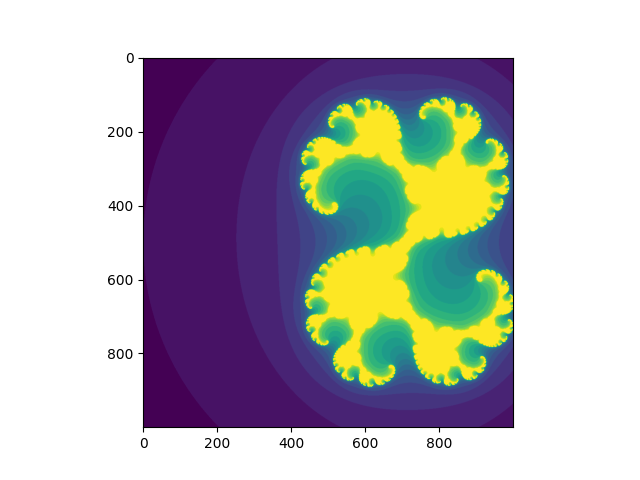

In [26]:
np.vectorize
def iteration(c,z,max):
    k=0
    while k < max and abs(c)<=2:
        c = c**2 + z
        k+=1
    return k


ite=np.vectorize(iteration)


def mandelbrot(w, h, z):
    x=np.linspace(-2,0.8,w)
    y=np.linspace(-1.4,1.4,h)
    pave = np.meshgrid(x,y)
    c=pave[0]+1j*pave[1]
    diverge=ite(c,z,max)
    print(diverge)
    plt.imshow(diverge)
    plt.show()
    
h,w=1000,1000
max = 20
a,b=np.random.uniform(-1,1),np.random.uniform(-1,1)
z=a+1j*b        
mandelbrot(w,h,z)     
# x=np.linspace(-2,0.8,1000)
# y=np.linspace(-1.4,1.4,1000)
# pave = np.meshgrid(x,y)
# print(pave)



## v2

* on peut passer en paramètre à la fonction
  * le domaine en x et en y
  * le nombre maximum d'itérations
* on veut pouvoir produire une image (pour l'insérer dans l'énoncé par exemple)
  * quels formats sont disponibles ?
  * sauvez votre image dans un format vectoriel
  * affichez cette depuis votre notebook

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


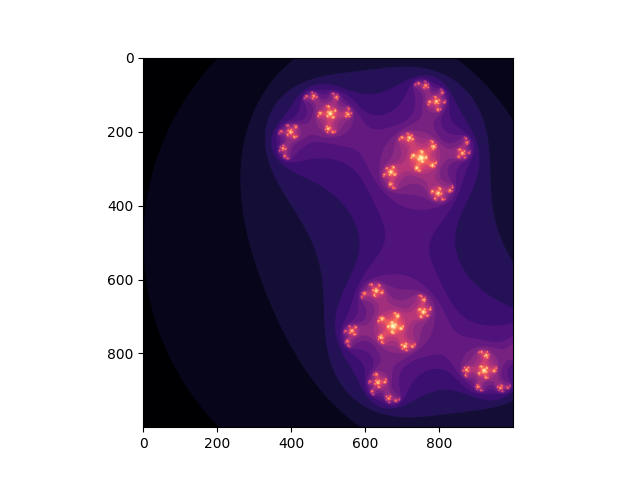

In [28]:
def mandelbrot(w, h, z, max, X,Y):
    x=np.linspace(X[0],X[1],w)
    y=np.linspace(Y[0], Y[1],h)
    pave = np.meshgrid(x,y)
    c=pave[0]+1j*pave[1]
    diverge=ite(c,z,max)
    print(diverge)
    plt.imshow(diverge, cmap='magma')
    plt.savefig("image_vectorielle.png", format='png')
    plt.show()
    
w,h,z,max,X,Y=1000,1000,0.5-1j*0.5,20,[-2,0.8],[-1.4,1.4]
mandelbrot(w, h, z, max, X,Y)
#Les formats dispos comptent aussi svg et pdf